In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv('flipkart.csv')
df.head()

,Unnamed: 0,ProductName,stars,Rating,Reviews,CPU,Ram,storage,size,actual_price,flipkart_offer
0,0,ASUS,4.2,258,24,Celeron,4,128,29.46,30990,20990
1,1,ASUS,3.6,11,1,i3,8,512,39.62,51990,38236
2,2,ASUS,4.2,"2,860",278,i3,8,512,39.62,56990,34990
3,3,Lenovo,4.1,"1,392",151,Celeron,8,256,39.62,46090,26989
4,4,Lenovo,4.3,"5,381",510,i3,8,512,39.62,55490,36950


In [3]:
df=df.drop(['Unnamed: 0','Rating','Reviews'],axis=1)

In [4]:
df.head()

,ProductName,stars,CPU,Ram,storage,size,actual_price,flipkart_offer
0,ASUS,4.2,Celeron,4,128,29.46,30990,20990
1,ASUS,3.6,i3,8,512,39.62,51990,38236
2,ASUS,4.2,i3,8,512,39.62,56990,34990
3,Lenovo,4.1,Celeron,8,256,39.62,46090,26989
4,Lenovo,4.3,i3,8,512,39.62,55490,36950


In [5]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

<AxesSubplot: xlabel='flipkart_offer', ylabel='Density'>

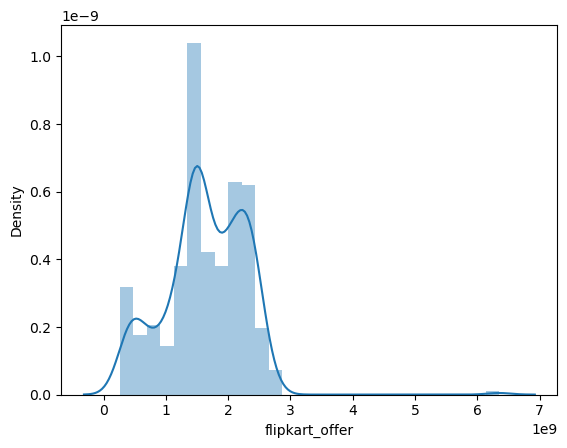

In [6]:

sns.distplot((np.square(df['flipkart_offer'])))

In [7]:
a=np.log(np.square(df['flipkart_offer']))
a

0      19.903603
1      21.103066
2      20.925635
3      20.406369
4      21.034642
         ...    
441    21.598743
442    19.996686
443    21.599151
444    21.515380
445    21.168112
Name: flipkart_offer, Length: 446, dtype: float64

In [8]:
x=df.drop(columns=['flipkart_offer'])
y=np.log(np.square(df['flipkart_offer']))

In [9]:
df.head(3)

,ProductName,stars,CPU,Ram,storage,size,actual_price,flipkart_offer
0,ASUS,4.2,Celeron,4,128,29.46,30990,20990
1,ASUS,3.6,i3,8,512,39.62,51990,38236
2,ASUS,4.2,i3,8,512,39.62,56990,34990


## train_test_split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.15,
                                               random_state=2)

In [12]:
x_train.dtypes

ProductName      object
stars           float64
CPU              object
Ram               int64
storage           int64
size            float64
actual_price      int64
dtype: object

# categorical data

## linear regression

In [13]:
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [14]:


step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),['ProductName','CPU'])
],remainder='passthrough')

step2 =LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred =pipe.predict(x_test)


print('R2_SCORE:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))

R2_SCORE: 0.8374727260429184
MAE: 0.13897279133773058


In [15]:
np.exp(0.13)

1.1388283833246218

## Ridge Regression

In [16]:
from sklearn.linear_model import Ridge,Lasso

In [17]:
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),['ProductName','CPU'])
],remainder='passthrough')

step2 =Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred =pipe.predict(x_test)

print('R2_SCORE:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))

R2_SCORE: 0.838712907772702
MAE: 0.15029514991866746


## LASO REGRESION  has second best in r2_score

In [18]:
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),['ProductName','CPU'])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe_laso = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_laso.fit(x_train,y_train)

y_pred =pipe_laso.predict(x_test)

print('R2_SCORE:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))

R2_SCORE: 0.838712907772702
MAE: 0.15029514991866746


## kNN

In [19]:
from sklearn.neighbors import KNeighborsRegressor

In [20]:
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),['ProductName','CPU'])
],remainder='passthrough')

step2 =  KNeighborsRegressor(n_neighbors=5)


pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred =pipe.predict(x_test)

print('R2_SCORE:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))

R2_SCORE: 0.812432312349145
MAE: 0.1452882702740753


## DECISION TREE

In [21]:
from sklearn.tree import DecisionTreeRegressor


In [22]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),['ProductName','CPU'])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.866444312596794
MAE 0.10072346235576014


## Random forest till now show best case 

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
step1 = ColumnTransformer([
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),['ProductName','CPU'])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe_1 = Pipeline(steps=[
    ('step1',step1),
    ('step2',step2)
])

pipe_1.fit(x_train,y_train)

y_pred = pipe_1.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9076497060891238
MAE 0.09094334260854199


In [25]:
df.head(1)

,ProductName,stars,CPU,Ram,storage,size,actual_price,flipkart_offer
0,ASUS,4.2,Celeron,4,128,29.46,30990,20990


# expoting models

In [38]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe_1,open('pipe_1.pkl','wb'))

In [27]:
x_train.dtypes

ProductName      object
stars           float64
CPU              object
Ram               int64
storage           int64
size            float64
actual_price      int64
dtype: object

In [36]:
df.head(4)

,ProductName,stars,CPU,Ram,storage,size,actual_price,flipkart_offer
0,ASUS,4.2,Celeron,4,128,29.46,30990,20990
1,ASUS,3.6,i3,8,512,39.62,51990,38236
2,ASUS,4.2,i3,8,512,39.62,56990,34990
3,Lenovo,4.1,Celeron,8,256,39.62,46090,26989
